# Introduction to Machine Learning: Supervised Learning - Final Project

https://github.com/sergeevvvv/anaemia-prediction

Viacheslav Sergeev <viacheslav.sergeev@colorado.edu>

University of Colorado Boulder


## Supervised Learning & EDA Problem Description

### Problem Statement

Anemia is a blood disorder in which the blood has a reduced ability to carry oxygen. This can be due to a lower than normal number of red blood cells, a reduction in the amount of hemoglobin available for oxygen transport, or abnormalities in hemoglobin that impair its function. [[source]](https://en.wikipedia.org/wiki/Anemia). The method of diagnosis is blood test.

Develop a supervised machine learning approach including EDA procedure, analysis (model building and training), result, and discussion/conclusion to predict likelihood of patient's anaemic status based on blood test results.

## Dataset Source
I use Kaggle "Anemia Diagnosis" dataset. The dataset doesn't have any assosiated code as of project development date.

## Anemia Diagnosis Dataset
The present dataset has been painstakingly selected to facilitate the creation of advanced machine learning models intended to forecast anemia. It offers a thorough method of detecting anemia by combining, in a novel way, color pixel distribution data obtained from related clinical imaging with hemoglobin levels. A unique instance is represented by each row in the dataset, which contains a range of attributes such clinical symptoms, medical history, and demographic data. Lower hemoglobin levels are generally indicative of anemia. Hemoglobin levels are measured in grams per deciliter (g/dL) and offer a direct association with the disorder. A thorough examination of visual indicators like skin pallor and conjunctival color—which are known to be correlated with anemia—is made possible by the addition of image data. The dataset provides further information by examining the color pixel distribution in these photos, which can improve the algorithms' predicting performance. Given that age and gender have a substantial impact on hemoglobin levels and the prevalence of anemia, their addition considerably enriches the information. This dataset is intended to enhance clinical decision-making as well as early detection and predictive analytics, among other machine learning applications. This dataset attempts to increase the precision and dependability of anemia diagnosis by utilizing the combined strength of sophisticated image analysis and conventional hematological data, ultimately leading to better patient outcomes and more efficient healthcare interventions.

## Dataset Glossary (Column-wise)
- Number: Unique identifier for each dataset entry.
- Sex: Gender of the individual (e.g., Male or Female).
- %Red Pixel: Percentage of red pixels in the associated image.
- %Green Pixel: Percentage of green pixels in the associated image.
- %Blue Pixel: Percentage of blue pixels in the associated image.
- Hb: Hemoglobin level measured in grams per deciliter (g/dL).
- Anaemic: Indicator of anemia status (1 for anemic, 0 for non-anemic).


## 1. Data Loading

In [1]:
# dataset downloading using kaggle api lib
!kaggle datasets download -d zeesolver/uhygtttt

Dataset URL: https://www.kaggle.com/datasets/zeesolver/uhygtttt
License(s): Apache 2.0
  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 2.92MB/s]


In [47]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

In [23]:
import zipfile
import os

with zipfile.ZipFile('uhygtttt.zip', 'r') as zip_ref:
  zip_ref.extractall('dataset')


In [24]:
import pandas as pd
df = pd.read_csv('dataset/output.csv')
print(len(df))
df.head()

104


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [25]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


## 2. Data Preprocessing

Numerical encoding of categorial features make the dataframe consistently numerical making it possible to apply any ML classifiers. Both categorial features presented in the dataset are binary and non-null making it easy to encode them.

I also drop `Number` feature because it doesn't provide any useful information. It's a noise but in the worst-case scenario it would create a data leakage if model learns false-patterns that could even make the model worse.

In [26]:
categorial_features = ['Sex', 'Anaemic']
numerical_features = list(set(df.columns) - set(categorial_features))

print(f'Numerical features {numerical_features}')
print(f'Categorial features {categorial_features}')

print(f"for Sex feature missing {len(df[df['Sex'].isna() == True])} values")
print(f"for Anaemic feature missing {len(df[df['Anaemic'].isna() == True])} values")


df['Sex'] = df.apply(lambda x: 1 if x['Sex'].strip() == 'F' else 0, axis=1)
df['Anaemic'] = df.apply(lambda x: 1 if x['Anaemic'] == 'Yes' else 0, axis=1)

df = df.drop(columns=['Number'], axis=1)

df

Numerical features ['Hb', '%Red Pixel', 'Number', '%Green pixel', '%Blue pixel']
Categorial features ['Sex', 'Anaemic']
for Sex feature missing 0 values
for Anaemic feature missing 0 values


,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,0,43.2555,30.8421,25.9025,6.3,1
1,1,45.6033,28.1900,26.2067,13.5,0
2,1,45.0107,28.9677,26.0215,11.7,0
3,1,44.5398,28.9899,26.4703,13.5,0
4,0,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,1,49.9999,29.2860,20.7141,14.5,1
100,0,42.2324,30.6757,27.0919,6.3,1
101,1,45.6064,31.9084,22.4852,12.7,0
102,0,45.2095,29.2769,25.5136,13.4,0


## 3. EDA
### 3.1 Correlation Matrix
Comparing correlation between target feature `Anaemic` with other features we can say that it's stronly correlated with `Hb`. `%Blue pixel` and `Sex` have weak correlation and potential noise.
`%Red`-`%Green` and `%Blue`-`%Red` are also strongly correlated therefore these features are potentially redundant.

In [27]:
!pip install plotly

In [28]:
import plotly.express as px

corr_matrix = df.corr()
fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                title='Correlation Matrix')


fig.show()

#### 3.2 Features & Target Correlations with Logistic Regression Application for data slices

I use scatterplot to look at relationship between main features. I use color encoding for points to see relationship vs both X and Y feature at the same time so it's kinda 3D plot.

Visually anaemic points are clearly separated on any XY plot so I also train a basic logistic regression to plot decision boundary with % accuracy to measure the number of outliers.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import numpy as np

def scatter_plot_clf(df, feature1, feature2):
    # we have scatter plot X = feature1, Y = feature2
    # and target var is Anaemic color
    # I use LogisticRegression to predict (X,Y) that separates Anaemic feature
    # and then plot the decision surface
    X = df[[feature1, feature2]]
    y = df['Anaemic']

    logreg = LogisticRegression()
    logreg.fit(X, y)

    y_pred = logreg.predict(X)
    accuracy = accuracy_score(y, y_pred) * 100

    # ref: https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a
    # decision surface
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2])
    Z = logreg.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    return xx,yy,Z,accuracy


def scatter_plot_with_labels_as_colors(df, feature1 = '%Red Pixel', feature2 = 'Hb'):
    xx,yy,Z,accuracy = scatter_plot_clf(df, feature1, feature2)

    colors = df['Anaemic'].map({0: 'blue', 1: 'red'})
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(df[feature1], df[feature2], c=colors, edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'{feature2} vs {feature1} with Anaemic Status and Decision Boundary\nAccuracy: {accuracy:.2f}%')
    plt.grid(True)
    plt.legend(['Decision Boundary', 'Anaemic (Red) / Non-Anaemic (Blue)'])
    plt.show()


#### 3.2.1 Features

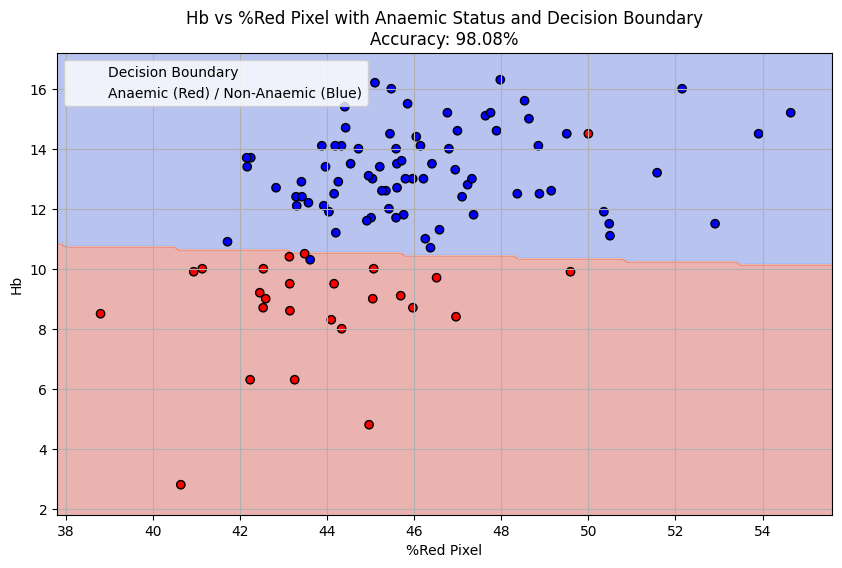

In [30]:
scatter_plot_with_labels_as_colors(df, feature1 = '%Red Pixel', feature2 = 'Hb')

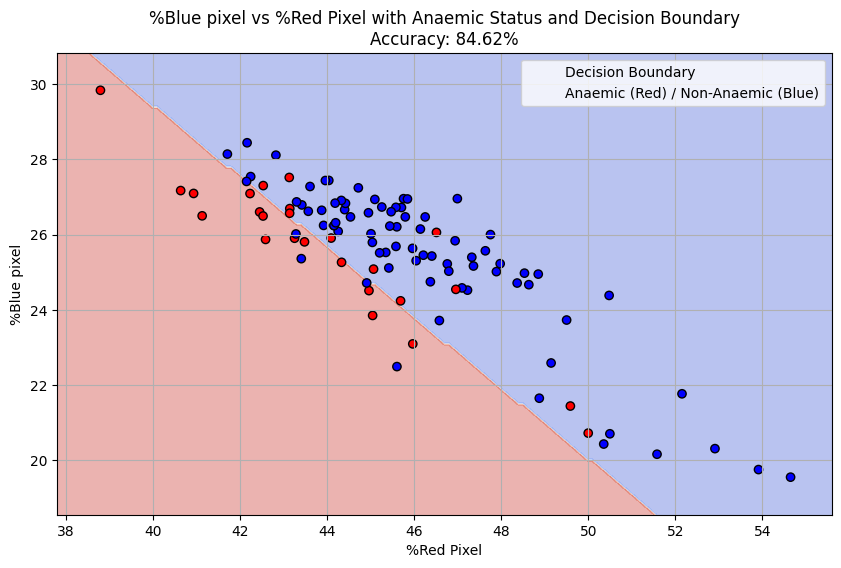

In [31]:
scatter_plot_with_labels_as_colors(df, feature1 = '%Red Pixel', feature2 = '%Blue pixel')

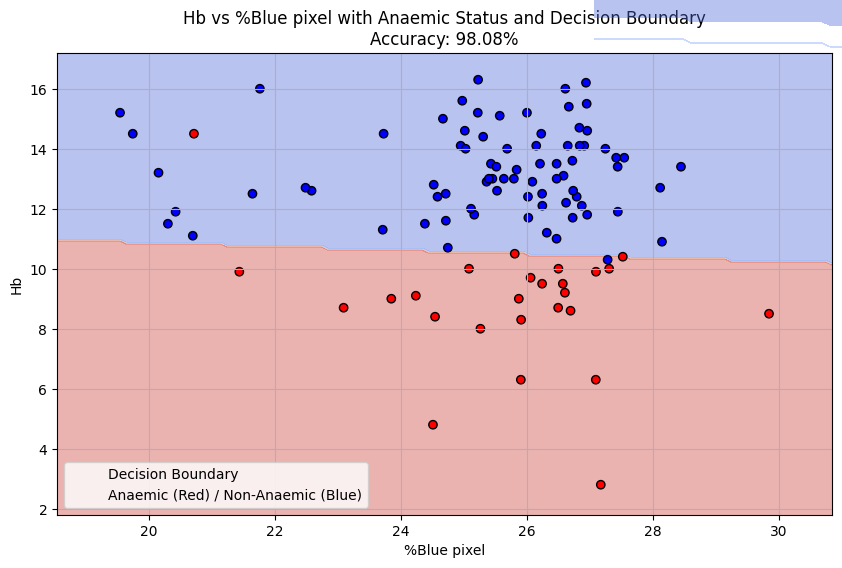

In [32]:
scatter_plot_with_labels_as_colors(df, feature1 = '%Blue pixel', feature2 = 'Hb')

#### 3.2.2 Sex Impact

Based on domain knowledge, we know that there is a difference for normal level of Hb that depends on sex. In the given dataset, there are more outliers for women.

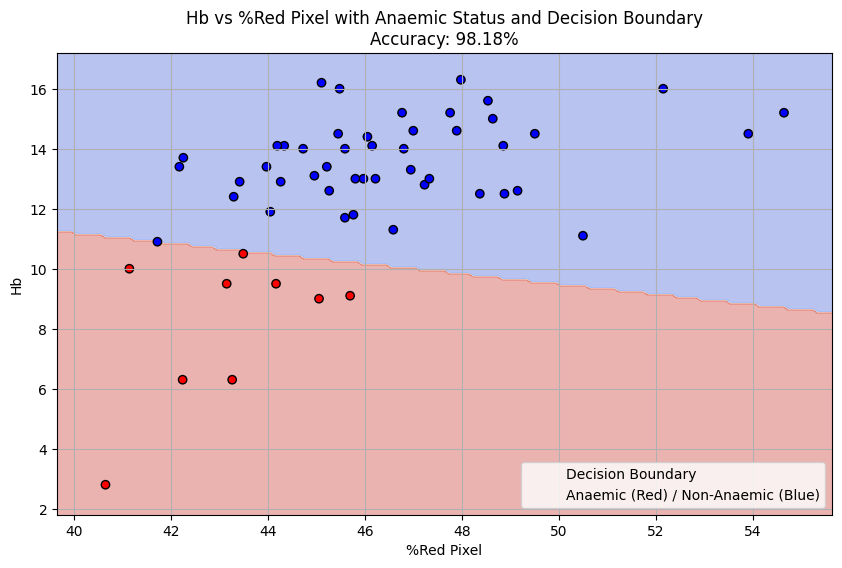

In [33]:
scatter_plot_with_labels_as_colors(df[df['Sex']==0], feature1 = '%Red Pixel', feature2 = 'Hb')

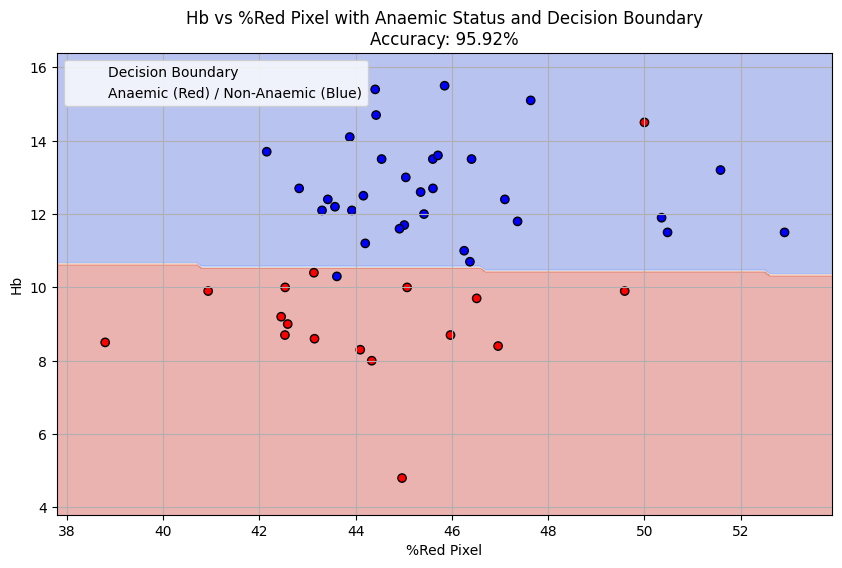

In [34]:
scatter_plot_with_labels_as_colors(df[df['Sex']==1], feature1 = '%Red Pixel', feature2 = 'Hb')

Target values are perfectly separated on any pair of XY features with 85-99% accuracy which means that perfect k-dim plane probably exists that should have separate points with accuracy close to 100%. Since the data is so separatable we can start ML experiments without special preprocessing.

## 4. ML
### 4.1 Train/test split, class balance

In [35]:
from sklearn.model_selection import train_test_split

y = df['Anaemic']
X = df.drop(columns=['Anaemic'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can't say that this dataset is balanced but at the same time it's not that unbalanced. I decided to test how the model would perforn as-is without applying dataset balancing technics.

In [40]:
print('Classes balance')

df[df['Anaemic']==0].count()[0], df[df['Anaemic']==1].count()[0]

Classes balance


(78, 26)

### 4.2 Hyperparameter Tuning
I use 5-fold kfold cross-validation with accuracy target metric in the grid search to find the best model.

In [41]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_optimization(clf, params):
  dt_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy')
  dt_grid.fit(X_train, y_train)
  return dt_grid.best_estimator_


### 4.3 Performance Evaluation

I use classification report and confusion matrix that includes all of the metric I need: precision, recall, f1, support, accuracy.

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def evaluate_the_model(clf):
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

### 4.4 Training
#### 4.4.1 Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

print('Decision tree - No tuning')
tree_clf = DecisionTreeClassifier()
evaluate_the_model(tree_clf.fit(X_train, y_train))

Decision tree - No tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]


The base model performs perfectly but I would like to simplify the model to prevent potential overfit.

In [44]:
print('Decision tree - After tuning')
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

best_tree_clf = hyperparameter_optimization(tree_clf, params)
print(best_tree_clf)
evaluate_the_model(best_tree_clf)

Decision tree - After tuning
DecisionTreeClassifier(min_samples_split=20)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]


Now the model has max depth that reduces probability of overfit

#### 4.4.2 Support Vector Machine

In [48]:
from sklearn.svm import SVC

svm_classifier = SVC()
print('SVC - No tuning')
evaluate_the_model(svm_classifier.fit(X_train, y_train))

svm_classifier_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

best_scv_clf = hyperparameter_optimization(svm_classifier, svm_classifier_params)
print('SVC - After tuning')
print(best_scv_clf)
evaluate_the_model(best_scv_clf)

SVC - No tuning
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21

[[16  0]
 [ 5  0]]
SVC - After tuning
SVC(C=1, kernel='poly')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]


Base model had pretty bad accuracy but hyperparameter tuning gives us perfect model.

#### 4.4.3 LogisticRegression

In [49]:
lr_classifier = LogisticRegression()
print('SVC - No tuning')
evaluate_the_model(lr_classifier.fit(X_train, y_train))

lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

lr_clf = hyperparameter_optimization(lr_classifier, lr_params)
print('LR - After tuning')
print(lr_clf)
evaluate_the_model(lr_clf)

SVC - No tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]
LR - After tuning
LogisticRegression(C=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]


For logistic regression we have perfect model without hyperparameters tuning.

### 4.5 Feature Selection

Based on EDA, we have a hypothesis that Blue pixel and Sex are redundant. Despite the fact that we have 3 perfect models I want to simplify them and reduct the risk of potential overfit. The experiment is to take all 3 best classifiers and drop 2 potentially redundant features detected during correlation analysis EDA and compare 3 best classifiers with these features and without them.

In [50]:
redundant_features = ['%Blue pixel', 'Sex']

best_models = [
    LogisticRegression(C=1),
    SVC(C=1, kernel='poly'),
    DecisionTreeClassifier(min_samples_split=20)
]

best_models_without_redundancy = []

for model in best_models:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  with_redundant = model.fit(X_train, y_train)
  y_pred_no_redundant = with_redundant.predict(X_test)

  without_redundant = model.fit(X_train.drop(columns=redundant_features, axis=1), y_train)
  y_pred = with_redundant.predict(X_test.drop(columns=redundant_features, axis=1))

  print(accuracy_score(y_test, y_pred) == accuracy_score(y_test, y_pred_no_redundant))
  best_models_without_redundancy.append(model)

X = X.drop(columns=redundant_features, axis=1)
X_test = X_test.drop(columns=redundant_features, axis=1)
X_train = X_train.drop(columns=redundant_features, axis=1)

True
True
True


All of the models still have 100% accuracy even without Blue pixel and Sex features what confirms a hypothesis that these features are redundant. In the next steps I will use X without these features.

### 4.6 Ensembling

Now, having 3 perfect models I unite them into ensemble with major voting. For example, if models predictions are [0, 0, 1] the final prediction is 0. Despite perfect performance of every model, ensembling reduces risk of outliers/overfit in the real-life application of the model.

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

eclf1 = VotingClassifier(
    estimators=[
        ('LogisticRegression', best_models_without_redundancy[0]),
         ('SVC', best_models_without_redundancy[1]),
          ('DecisionTreeClassifier', best_models_without_redundancy[2])
          ], voting='hard')

eclf1 = eclf1.fit(X, y)
evaluate_the_model(eclf1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[16  0]
 [ 0  5]]


## 5. Real-time inference

We have a ~100% accuracy model with minimized number of required features and minimized risk of overfit.

Here's a simple application that could be used to predict the risk of anaemic status based on Hb level and Red/Green pixels in the image entered by user real-time.

In [52]:
print('%Red Pixe')
red = float(input())
print('%Green pixel')
green = float(input())
print('Hb')
hb = float(input())
request_vector = pd.DataFrame([[red, green, hb]], columns=X.columns.tolist())

if eclf1.predict(request_vector) == [[1]]:
  print('Anaemic status model estimate: YES')
else:
  print('Anaemic status model estimate: NO')

%Red Pixe
1
%Green pixel
10
Hb
20
Anaemic status model estimate: NO


# Conclusion

The ensemble of fine-tuned models successfully predicts patient's anaemic status using hemoglobin blood test with 100% test set accuracy using only 3 features with minimized risk of overfit and deep exploratory data analysis. The source of truth is Kaggle "Anemia Diagnosis" dataset. The UI for real-time inference is also provided.
